In [8]:
from pathlib import Path
file = Path("article_json_author") / "denik.json"

In [9]:
from article_utils import create_df
df = create_df(file)
df.Name = "denik"

In [10]:
df.describe()

,article length,headline length,brief length,num words,num words ratio,num words per line,avg word length,non-alpha,non-alpha ratio
count,980477.000000,980477.000000,978302.000000,980477.000000,980477.000000,980477.000000,980477.000000,980477.000000,980477.000000
mean,1956.462550,52.901591,211.766651,342.923935,0.173233,51.450624,4.938620,62.847547,0.030741
std,1689.441062,15.276012,101.267965,307.662923,0.017455,36.644027,0.711398,73.667441,0.014992
min,8.000000,1.000000,1.000000,1.000000,0.009259,1.000000,1.844156,0.000000,0.000000
25%,856.000000,41.000000,135.000000,145.000000,0.162996,34.950000,4.673077,22.000000,0.023322
50%,1613.000000,53.000000,195.000000,278.000000,0.170439,45.111111,4.967105,46.000000,0.027404
75%,2558.000000,65.000000,271.000000,446.000000,0.179894,58.750000,5.225806,78.000000,0.032596
max,59789.000000,164.000000,2192.000000,13123.000000,0.401894,6178.000000,108.000000,6247.000000,0.302925


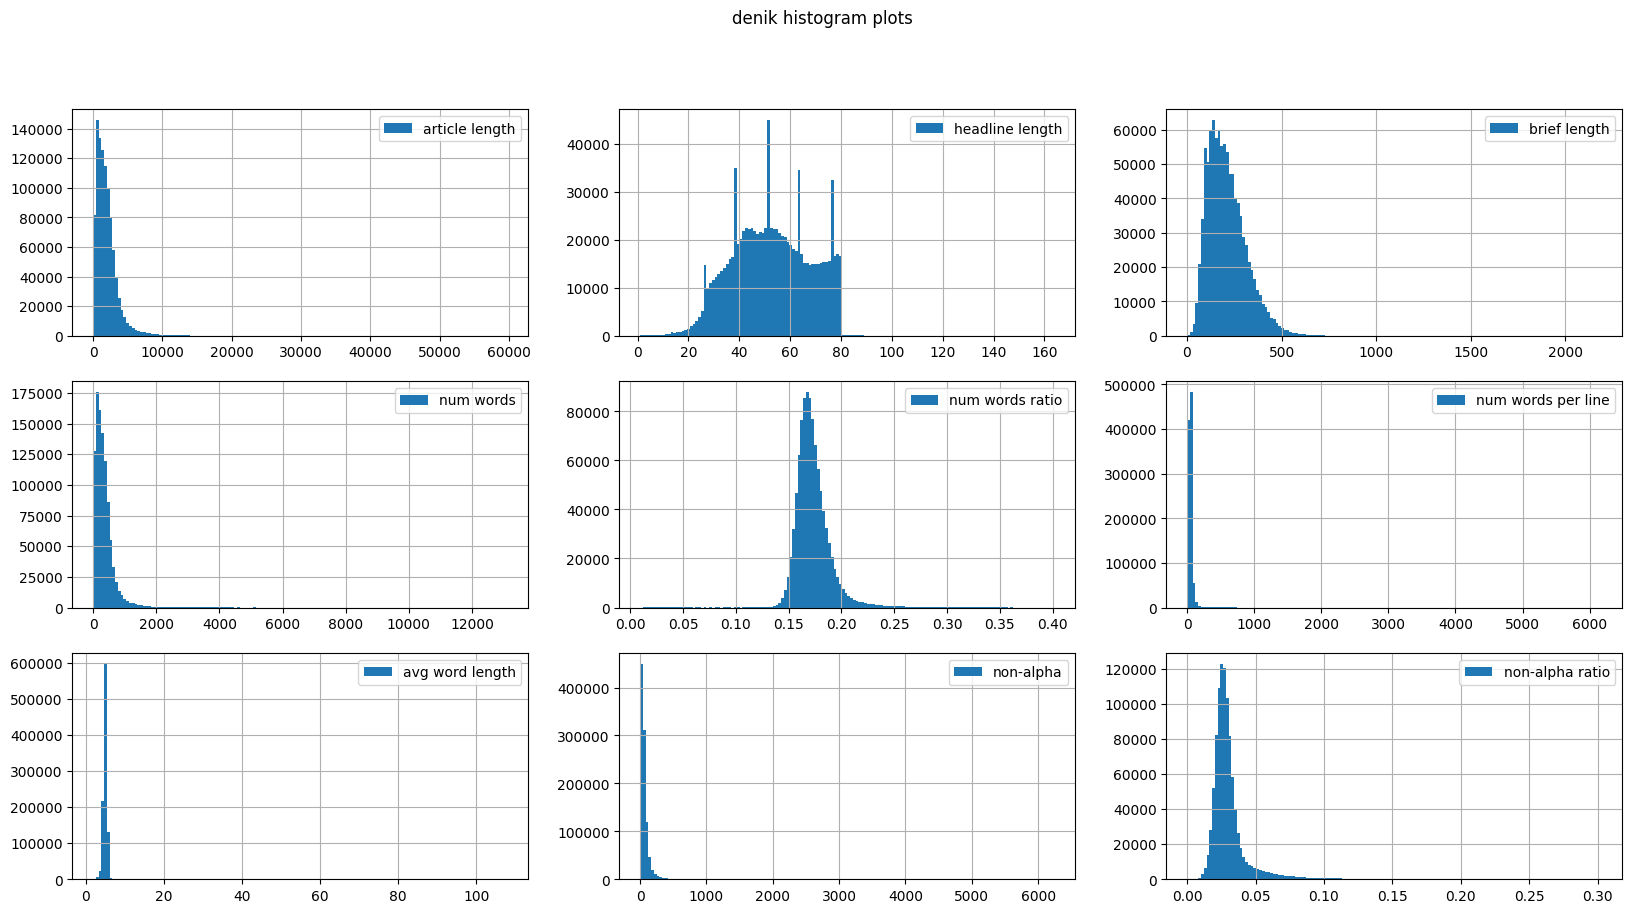

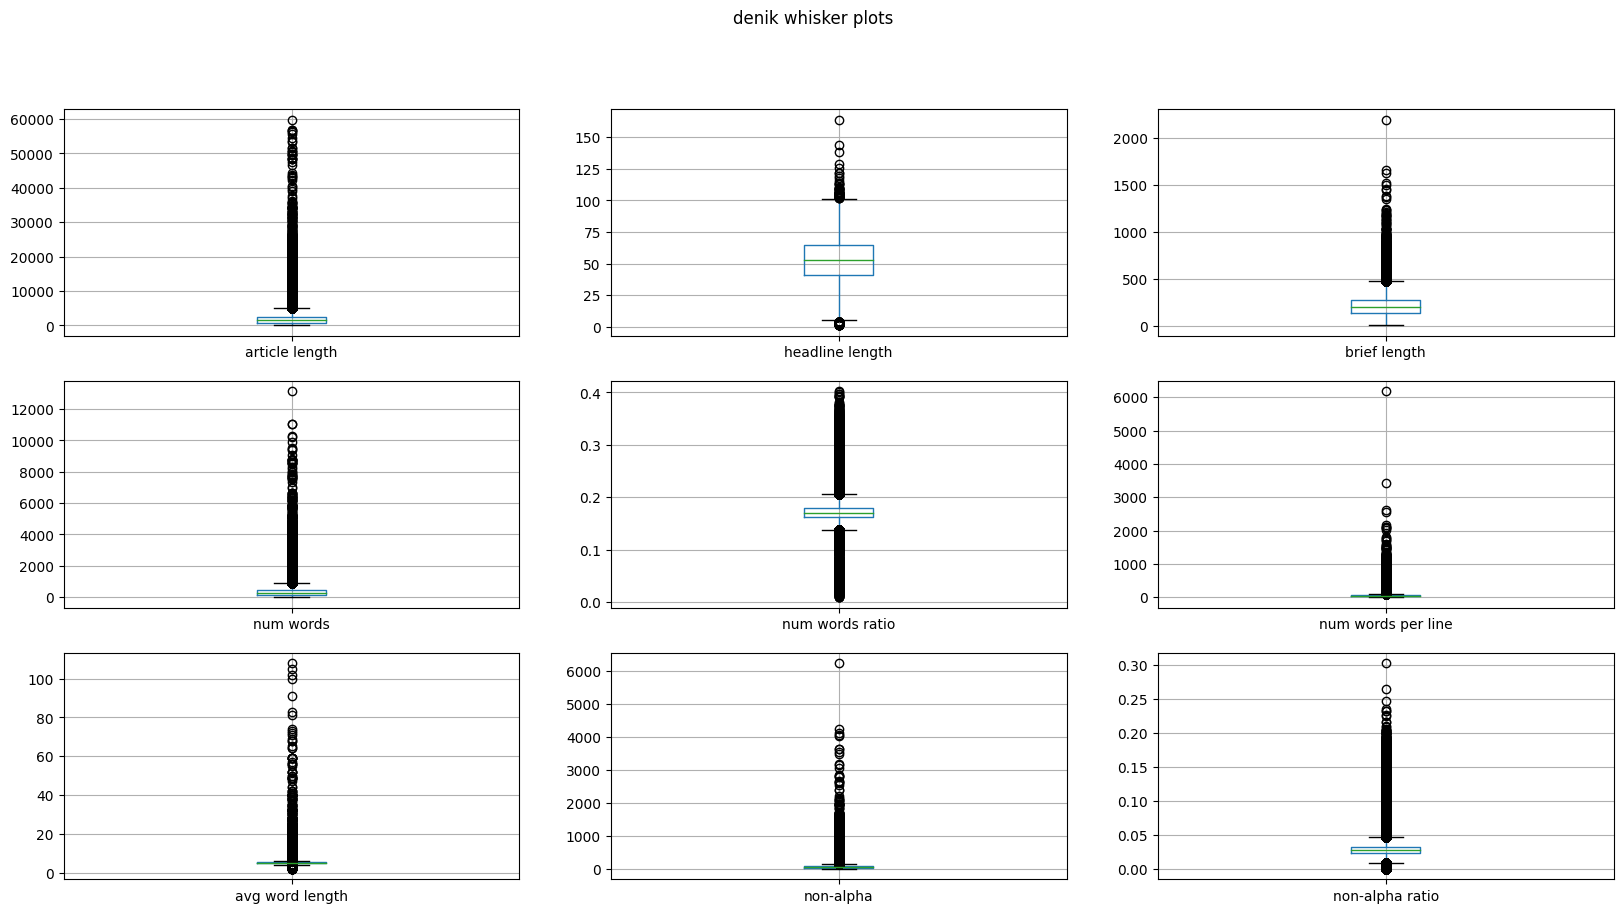

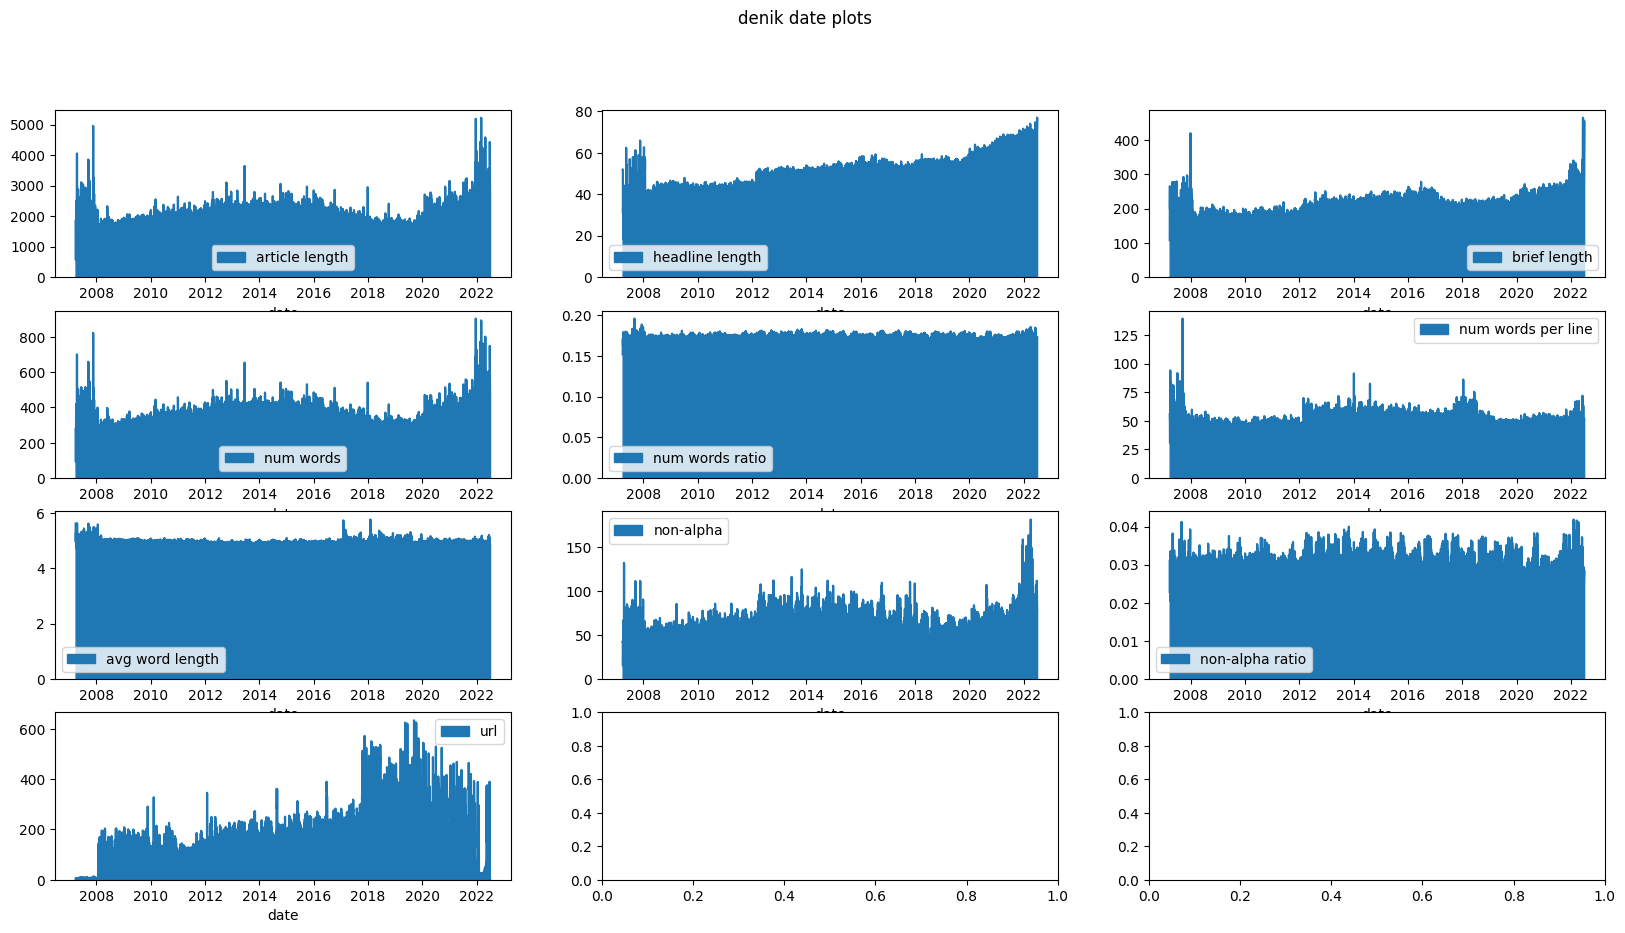

In [50]:
from article_utils import create_exploratory_plots
create_exploratory_plots(df,save=True)

In [40]:

from preprocess_utils import show_outlier_by_percentiles, show_df_lines, show_outliers, pick_indexes
col = "headline length"
headline_mod = lambda x: x["headline"]

df_tmp = show_outliers(df, col, 140, "higher", limit=20)
show_df_lines(df_tmp, file, headline_mod)
# Okayage

Když sukno střihaly metr velké nůžky Městské muzeum ve Volyni zve do 10. dubna na výstavu o soukenících, kloboučnících, barvířích i punčochářích
Utkání nováčků krajského přeboru Nového Jičína a Jakubčovic skončilo na podzim v Novém Jičíně nerozhodně 1:1. Druhý vzájemný zápas budou na jaře hostit Jakubčovice.


KeyboardInterrupt: 

In [41]:

df_tmp = show_outliers(df, col, 20, "lower", limit=10, random=False)
show_df_lines(df_tmp, file, headline_mod)

# Shows that we shouldn have split by -

V derby jde o hodně
V přírodě je krásně
S koupáním je konec
Opraví staré sklepy
Hypersport Mercedes
Proč zvonily klíče?
Baby boom se nekoná
Přehled utkání MSFL
Ruční česání chmele
LINDE POHONY s.r.o.


In [56]:
df_tmp = df.sort_values(col, ascending=False)
show_df_lines(df_tmp[0:1], file, headline_mod)

https://novojicinsky.denik.cz/fotbal_region/utkani-novacku-krajskeho-preboru-nov20090102.html
Utkání nováčků krajského přeboru Nového Jičína a Jakubčovic skončilo na podzim v Novém Jičíně nerozhodně 1:1. Druhý vzájemný zápas budou na jaře hostit Jakubčovice.


In [55]:
grouped = df.groupby(col).count()
# peaking because bin size > max(headline length)
grouped[35:90]

drop = df[df[col] == 80].sample(20)

mod = lambda x: x["url"] + "\n" + x["headline"]
show_df_lines(drop, file, mod)






https://vyskovsky.denik.cz/zpravy_region/ve-vyskovske-nemocnici-spustili-ockovaci-misto-testuje-se-na-poliklinice-2021021.html
Ve vyškovské nemocnici spustili očkovací místo, testování probíhá na poliklinice
https://slovacky.denik.cz/zpravy_region/v-nejmensi-vesnici-zlinskeho-kraje-si-pri-volbach-lide-mohou-prohlednout-vystavu.html
V nejmenší vesnici Zlínského kraje si při volbách lidé mohou prohlédnout výstavu
https://www.denik.cz/rodina/desive-svedectvi-z-uprchlickeho-tabora-v-sudanu-beznadej-spina-hlad-a-smrt-20180804.html
Děsivé svědectví z uprchlického tábora v Súdánu: Beznaděj, špína, hlad a smrt...
https://zlinsky.denik.cz/ctenar-reporter/zlin-film-festival-doslo-i-k-vyjimecnemu-setkani-hercu-h-loma-a-pierra-briceho-2.html
Zlín Film Festival: Došlo i k výjimečnému setkání herců H. Loma a Pierra Briceho
https://www.denik.cz/veda-a-technika/mezinarodni-vesmirna-stanice-je-nejdrazsim-projektem-lidstva.html
Nejdražší projekt v historii. Mezinárodní vesmírná stanice je obydlená už 21

https://hranicky.denik.cz/kultura_region/loutka_pr20070518.html
Přerov bude o víkendu patřit loutkohercům, vystoupí deset souborů
https://zlinsky.denik.cz/zpravy_region/podvodnici-nabizeji-kradene-zb.html
Podvodníci nabízejí kradené věci lidem v bytech i na parkovištích
https://zatecky.denik.cz/zpravy_region/filmari_zatec_20070511.html
Filmaři se opět vrátí do Žatce, natočí seriály i příběh z války
https://slovacky.denik.cz/zpravy_region/zlin-tyrane-deti20070531.html
Speciální výslechová místnost pro týrané děti ve Zlíně nebude
https://brnensky.denik.cz/zpravy_region/narodni_odpor_zaloba_20070515.html
Extrémisté z Národního odporu podali trestní oznámení
https://prerovsky.denik.cz/zpravy_region/zemedelska_vystava20070518.html
Výstava zvířat začala, do Přerova míří davy, komplikuje se doprava
https://slovacky.denik.cz/zpravy_region/osvetimany-vlcak-sezona-paintb.html
Ranč Vlčák ožije aktivní turistikou, hudbou, ale i paintballem
https://brnensky.denik.cz/cerna_kronika/advokat_uplatky_br

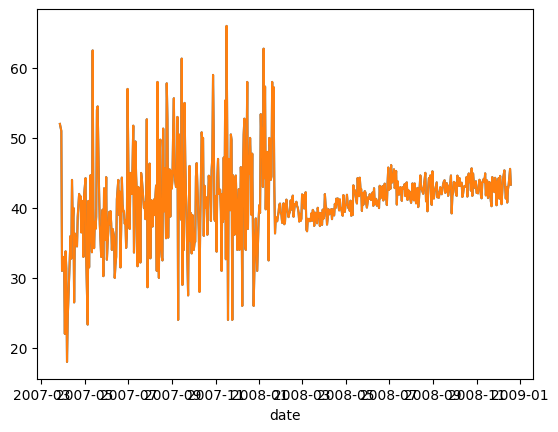

In [64]:
from datetime import datetime
from article_utils import inspect_drop_date
mod = lambda x: x["url"] + "\n" + x["headline"]

inspect_drop_date(df, col, file, mod, datetime(2006, 12, 1), datetime(2008, 12, 20), type="up", middle=datetime(2007, 6, 1))
inspect_drop_date(df, col, file, mod, datetime(2006, 12, 1), datetime(2008, 12, 20), type="down", middle=datetime(2007, 6, 1))








array([[<AxesSubplot:title={'center':'article length'}>]], dtype=object)

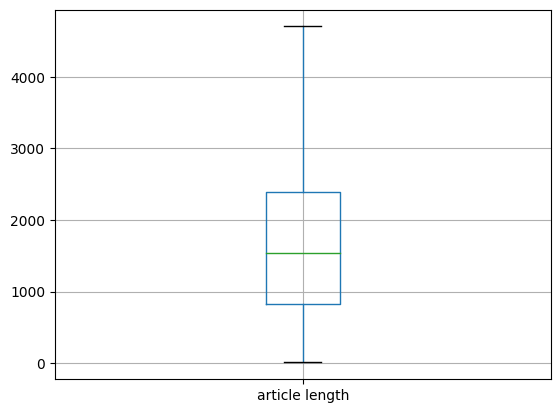

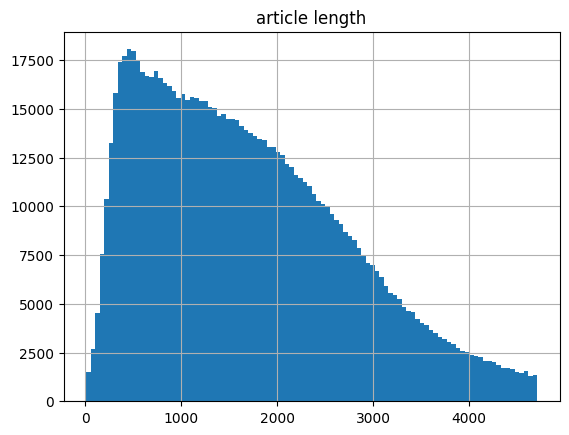

In [20]:

import numpy as np
# ARTICLE LENGTH
#show_df_lines(df_art, file, mod)
col = "article length"
# Long articles -> podcast transcript
df_art = df[df[col] < np.quantile(df[col], 0.95)]
df_art.boxplot(column=col)
df_art.hist(column=col, bins=100)


In [65]:
df_art = show_outliers(df,col, 30000, "higher" , limit=5)

content_mod = lambda art : art["url"] + "\n" + art["content"] + "\n---------------\n"
show_df_lines(df_art, file, content_mod)

In [67]:
from preprocess_utils import show_outliers
col = "article length"
df_art = show_outliers(df,col, 200, "lower", limit=10, random=False)
show_df_lines(df_art, file, content_mod)

https://prostejovsky.denik.cz/zpravy_region/obrazem-den-bez-aut-bavil-v-prostejove-stovky-deti-20160922.html
„Akci připravujeme už 10 let. Letos se jí účastní přibližně 320 dětí, ty nejvzdálenější přijely až z Čelechovic," řekl za organizátory Michal Esterka, učitel tělocviku ZŠ Jana Železného v Prostějově.
---------------

https://rychnovsky.denik.cz/zlociny-a-soudy/celnici-akce-dusicka-falesne-padelky-padelane-zbozi101219-hk.html
V Náchodě, Nové Pace, Hronově a Jaroměři nabízeli prodejci zboží s designem zaměnitelným s průmyslovými vzory a ochrannými známkami. Prodejem by majitelům práv vznikla škoda přesahující milion korun.
---------------

https://taborsky.denik.cz/ostatni_region/tym-el-magico-ziskal-skalp-vyse-postaveneho-virtualu-20180108.html
Opravdovým bojem se ovšem z hlediska výsledků nestalo žádné z odehraných střetnutí. Vzhledem k tabulkovému postavení lze označit za nečekanou pouze výhru El Magica nad do té doby druhým Virtualem FC.
---------------

https://ceskobudejovic

In [ ]:
col = "article length"
inspect_drop_date(df, col, file, content_mod, datetime(2006, 12, 1), datetime(2008, 12, 20), type="up", middle=datetime(2007, 6, 1))

In [68]:
# Word length

col = "avg word length"
df_word = show_outliers(df,col, 30, "higher", limit=5)
# shows 
show_df_lines(df_word, file, content_mod)

https://pr.denik.cz/doporucujeme/plavecka-hala-kadan-20211206.html
https://www.koupalistekadan.cz/ https://www.koupalistekadan.cz/
---------------

https://reklama.denik.cz/reklama/to-nejlepsi-z-klasiky-eva-urbanova-7-7-2018-20-00-kongresovy-sal-jesenik-20180628.html
www.klasternihudebnislavnosti.cz
---------------

https://doporucujeme.denik.cz/doporucujeme/autosluzby-liska-kompletni-servis-pro-vase-auto-20200420.html
https://www.autosluzbyliska.cz/
---------------

https://doporucujeme.denik.cz/doporucujeme/dozp-oleska-kamenice-p-o-prijme-socialniho-pracovnika-20190503.html
http://dozp-oleska-kamenice.cz/
---------------

https://doporucujeme.denik.cz/doporucujeme/pramos-nabizi-velky-vyber-jizdnich-kol-a-elektrokol-20190527.html
http://www.pramoscyklosport.cz/
---------------



In [24]:


df_word = show_outliers(df,col, 3.8,  "lower", limit=5, random=False)
show_df_lines(df_word, file, content_mod)


https://karlovarsky.denik.cz/fotbal_region/ostrov-splatil-lomnici-dluhy-i-s-uroky-podvanacte-doma-dosahl-na-tri-body-20180528.html
A bylo se na co koukat. Lomnice především v prvním poločase Ostrováky, kteří plnili roli favorita a soupeři ze Sokolovska měli po podzimní prohře co splácet, řádně zlobila.
Ostrováci nemohli nastartovat své gólové motory proti dobře organizované obranné hře soupeře. To se podařilo až v závěru prvního poločasu, kdy se střelecky zaskvělo ostrovské útočné duo Tomáš Bahleda, který se postaral o lahůdkový přímý kop z hranice šestnáctky, a poté zaokrouhlil svůj střelecký účet na číslo 40 Ondřej Nýber.
Po změně stran pak to byla v podání Ostrova fotbalová labutí píseň, když na tříbrankový rozdíl upravil ukazatel skóre Jakub Dušek, a když poté obstaral čtvrtý gól domácího výběru Petr Klaus, který měl na svědomí 130 zásahů Ostrováků v soutěži, nad Lomnicí se stahovala mračna. Jenže výběr trenéra Petra Zindla i přes nepříznivý vývoj duelu bojoval a dokázal dvěma góly

In [25]:
# Word num

col = "num words ratio"
mod = lambda art : art["content"]
df_word = show_outliers(df,col, 0.22, "higher", limit=10, random=False)
show_df_lines(df_word, file, content_mod)

https://zlinsky.denik.cz/fotbal_region/zlin-v-trencine-neuspel-vlach-alespon-vyzkousel-mlade-pusky-20140818.html
Kouč Vlach až na rutinéra Lešku nasadil velmi omlazenou sestavu a hned sedm hráčů juniorského věku, zatímco matadoři Čajánek, Marušák, Žižka, Balaštík, Veselý a Köhler dostali volno. Zato v dresu soupeře se proháněl zkušený Petrovický.
„Naše sestava byla značně obměněná. Kompletně celá obrana byla složená výhradně z mladých hráčů a v útoku jsme vyzkoušeli další juniory," poznamenal Vlach.
A minimálně s gólovými příspěvky „mladých pušek" mohl být spokojen. V prvním čtvrtečním zápase proti Skalici se prosadili Dominikové Matula s Hladišem, v sobotu proti Trenčínu zase jedinou trefu obstaral Kovařík.
„Jenže jsme měli hodně dalších šancí, ale bohužel jsme z nich vyšli naprázdno. Mohli jsme vyrovnat, scházely nám však góly. Náš výkon nebyl v celém průběhu zápasu špatný," podotkl Rostislav Vlach. ⋌(dan)
TRENČÍN – PSG ZLÍN 4:1 (1:0, 1:1, 2:0)
Branky a nahrávky: 10. Šimíček (Melichá

In [26]:

df_word = show_outliers(df,col, 0.11, "lower", limit=10)
mod = lambda art : art["content"]
show_df_lines(df_word, file, content_mod)


https://doporucujeme.denik.cz/doporucujeme/hledame-kandidatku-kandidata-na-pozici-pripravar-rozpoctar-20170425.html
více na: http://www.ekostavbylouny.cz
---------------

https://doporucujeme.denik.cz/doporucujeme/hofmann-consulting-s-r-o-20170407.html
Více na: http://www.gastrochomutov.cz
---------------

https://reklama.denik.cz/reklama/pontus-chomutov-zmena-adresy-kancelare-20170505.html
více na:  http://pontuschomutov.wz.cz
---------------

https://doporucujeme.denik.cz/doporucujeme/sobota-19-1-2019-saldorfske-sklepy-20190104.html
více na: http://saldorfske-sklepy.cz/
---------------

https://pisecky.denik.cz/zpravy_region/opravene-bakalare-soutezi-o-titul-stavba-roku-2017-20170922.html
PHlasovat pro Písek můžete do 5. října na webových stránkách soutěže, které najdete na http://www.stavbaroku.cz/printSites.do?Dispatch=ShowContestList&coid=73&group=registered
Bakaláře jsou pod číslem 35.
---------------

https://hradecky.denik.cz/tipy-na-kulturu/konzervatorske-dilny-20201012.html
K

280

https://kladensky.denik.cz/zpravy_region/lekar-tomas-drasnar-verim-tomu-ze-covid-19-bude-jednou-jen-detskou-nemoci-202105.html
/ROZHOVOR/ Vedoucí lékař na Covid oddělení slánské nemocnice, jedenačtyřicetiletý Tomáš Drasnar je jedním z prvních zdravotníků, kteří podstoupili očkování proti nemoci covid-19. Je si vědom toho, že jiná účinnější zbraň proti této nemoci v současné době neexistuje. Věří, že vyvinutá moderní vakcína je bezpečná a jen díky proočkování populace dokážeme nemoc v dohledné době překonat, protože dokud bude zdravotnictví přetížené, nebude ani život lidí normální a budeme se stále potýkat s restrikcemi.
---------------
 
https://www.denik.cz/film-a-televize/veci-kolem-tak-neprozivam-rika-ana-geislerova-20160415.html
Praha - Téměř sedm desítek rolí v celovečerních filmech, televizních snímcích a seriálech má na kontě oblíbená herečka Aňa Geislerová. Získala za ně devět nominací na České lvy, z nichž pět úspěšně proměnila. Loni získala i hereckou cenu na setkání fi

<AxesSubplot:xlabel='date'>

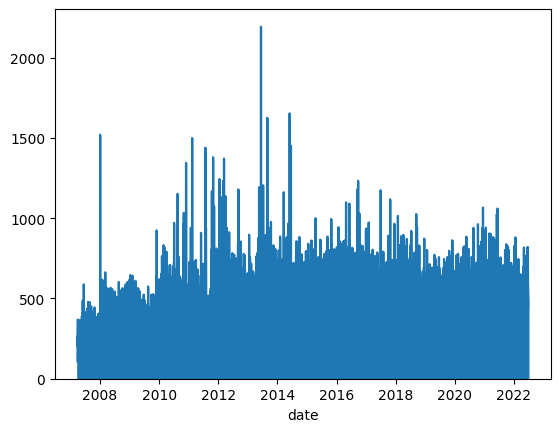

In [70]:
# BRIEF INSPECTION
col = "brief length"
df_tmp = show_outliers(df,col, 500, "higher", limit=10)
mod_brief = lambda x: x["url"] + "\n" + x["brief"] + "\n---------------\n "
print("280\n")
show_df_lines(df_tmp, file, mod_brief)
print("500\n")

df_tmp = show_outliers(df,col, 1300, "higher", limit=10)
show_df_lines(df_tmp, file, mod_brief)




In [71]:

df_tmp = show_outliers(df,col, 20, "lower", limit=20, random=False)
show_df_lines(df_tmp, file, mod_brief)


https://plzensky.denik.cz/tipy-na-dnesek/tip-na-ctvrtek-3-rijna-ivo-smoldas-v-presticich-20191002.html
Zábavně o politice.
---------------
 
https://jicinsky.denik.cz/kultura_region/aktualni-programova-nabidka-pohadkoveho-festivalu-20130914.html
Jičín – PROGRAM JMP
---------------
 
https://ceskobudejovicky.denik.cz/nazory_region/scitani-lidu-scitani-dusi20110314.html
Zamyšlení na neděli
---------------
 
https://jablonecky.denik.cz/fotbal_region/v-hlavni-roli-harba-20161002.html
Ve Zlíně remizovali
---------------
 
https://krkonossky.denik.cz/tipy-na-kulturu/kino-jitrenka-promita-v-tuto-dobu-online-ve-spolupraci-s-projektem-moje-kino-202.html
Tip na online film.
---------------
 
https://ceskobudejovicky.denik.cz/nazory_region/o-lidske-hlouposti20100607.html
Glosa Pavla Kroupy.
---------------
 
https://jablonecky.denik.cz/fotbal_region/co-nam-to-je-platne-rika-kouc-msena-20150901.html
JAK TO VIDĚL TRENÉ…
---------------
 
https://strakonicky.denik.cz/tipy-na-dnesek/tip-na-stredu-21-

In [31]:
col = "non-alpha ratio"
df_tmp = show_outliers(df,col, 0.06, "higher", limit=10)
show_df_lines(df_tmp, file, content_mod)
import numpy as np

https://prostejovsky.denik.cz/hokej_region/defenzivni-partii-ovladl-prostejov-jestrabi-udolali-trebic-v-najezdech-20190106.html
Jestřábi nastoupili opět bez opor Divíška s Žalčíkem a diváci moc branek neviděli. Hlavní úlohu sehráli brankáři a obrana obou mužstev.
V prvních dvaceti minutách branka nepadla.
„Začali jsme trošku vlažně. Bylo to hodně opatrné z obou stran. Nějaké šance jsme měli, ale bohužel trápí nás koncovka. Jinak zezadu jsme hráli parádně, kluky musím pochválit,“ okomentoval první část utkání prostějovská jednička v brance Jakub Neužil.
„V obraně jsme snad neudělali chybu. Z tohoto pohledu to byl z naší strany jeden z nejlepších zápasů, co jsme tady odehráli. Bohužel koncovka je žalostná,“ řekl prostějovský trenér Jiří Vykoukal.
Jestřáby trápila koncovka i minule v Ústí nad Labem.
„Měli jsme tam vyhrát, protože šancí jsme měli opravdu hodně. Dneska to stejné, pořád to cpeme do prázdné brány, místo toho, abychom vystřelili,“ vrátil se k předchozímu utkání prostějovský tr

In [32]:
col = "non-alpha ratio"
df_tmp = show_outliers(df,col, 0.01, "lower", limit=10)
show_df_lines(df_tmp, file, content_mod)
import numpy as np


https://tachovsky.denik.cz/zpravy_region/kvetiny-k-pamatnikum-obeti-valky-polozili-take-policiste-20200507.html
Připomínky této významné události se tak dějí bez účasti veřejnosti a individuálně. Ukončení druhé světové války si tento týden připomněli také policisté na Tachovsku, kteří se jinak vždy zúčastňovali oficiálních pietních aktů.
Květiny na paměť osvobození položili členové policejní delegace u památníku americké armádě v Tachově a dále u památníků obětí pochodu smrti na tachovské Mohyle a v Pístově.
---------------

https://rychnovsky.denik.cz/ctenar-reporter/zavzpominejte-na-hracky-vaseho-mladi-muzeum-ovladla-expozice-retrohracek-2021102.html
Hračky pocházejí převážně ze sbírky Městského muzea v Ústí nad Orlicí a doplňkově také od soukromých osob. Jde jen o některé vybrané fenomény z obrovského množství z uvedené doby, a zároveň expozice navazuje na předešlé výstavy tohoto druhu.
Expozice má u starších návštěvníků úlohu vyvolat příjemné vzpomínky na dětství a malým dětem posk

In [33]:
# num words per line
col = "num words per line"
df_tmp = show_outliers(df,col, 100, "higher", limit=10)
show_df_lines(df_tmp, file, content_mod)

https://moravskoslezsky.denik.cz/zdravi/petr-winkler-rozhovor-psychologie-20210813.html
V roce 2015 bylo v České republice zaznamenáno 655 tisíc lidí s duševním onemocněním. Po roce a půl s covidem se situace zhoršila. Jde o dramatický nárůst?Zmíněné číslo z roku 2015 se týká těch, které ošetřili v psychiatrických ambulancích. Skutečný počet lidí s duševním onemocněním je bohužel daleko větší, protože většina z nich nevyhledá odbornou pomoc.
Jak potom víte, že mají nějaké potíže?Vycházíme z epidemiologických údajů. Znamená to, že pomocí spe-ciálních dotazníků šetříme reálný výskyt duševních onemocnění. Data z roku 2017 naznačovala, že pětina dospělé české populace, která není institucionalizovaná (nepobývá v ústavních zařízeních pozn. red.), má duševní onemocnění. V souvislosti s covidem jsme toto šetření opakovali a zaznamenali jsme nárůst na třicet procent, jde tedy o padesátiprocentní navýšení. Skoro každý třetí občan České republiky prožíval psychické potíže.
Co si vlastně pod pojm

array([[<AxesSubplot:title={'center':'num words per line'}>]],
      dtype=object)

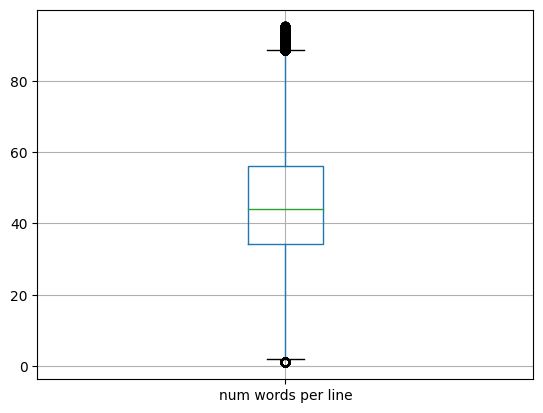

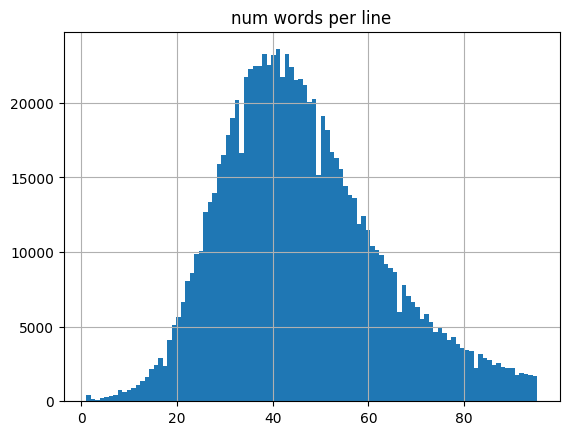

In [34]:

col = "num words per line"
df_art = df[df[col] < np.quantile(df[col], 0.95)]
df_art.boxplot(column=col)
df_art.hist(column=col, bins=100)

In [35]:

# num words per line
df_tmp = show_outlier_by_percentiles(df,col, 0.999, limit=2)
show_df_lines(df_tmp, file, content_mod)

https://kladensky.denik.cz/fotbal_region/zimni-kila-pujdou-dolu-stare-pasty-zahajily-jaro-20120414.html
Očekávaný souboj kdo s koho mezi dvěma nejlepšími týmy Družce a Kročehlav se uskuteční až 20. dubna, teď bylo povinností obou celků zvládnout úvodního soka. To se i povedlo lépe Družci, která zničila Stochov sedmi kousky a žádný nedostala. Kablo začalo doma se Stehelčevsí také impozantně,  v půli vedlo 5:0, ale po obrátce se trefovali spíš hosté a i díky parádnímu vlastenci Vaška korigovali na 6:3. Ostatní utkání byla vyrovnanější. Tuchlovice velmi brzy utekly Libušínu na 2:0, ale ten se pak ze zimního spánku probral, vyrovnal a dokonce byl blízko otočce skóre.  Slovan Kladno měl proti Rozdělovu (sousedé na mapě  i v tabulce) také dobrý nástup, ale hosté až do poslední minuty sahali po dalším ze svých překvapení, nicméně nakonec podlehli 3:4. Ve vyrovnaném utkání v Rynholci domácí vstřelili dva šťastné góly a věkově starší kladenská Sparta kontrovat nedokázala. Srbeč zase pozlobila S

In [36]:

df_tmp = show_outliers(df,col, 10, "lower", limit=2)
show_df_lines(df_tmp, file, content_mod)

https://mostecky.denik.cz/zpravy_region/kam-o-vikendu-na-mezibori-uz-budou-palit-carodejnice-v-moste-bude-pochod-20150424.html
Stavění máje a pálení čarodějnic
Kdy: sobota 25. dubna od 14:45
Kde: u zbrojnice a před budovou radnice
Program začne ve 14:45 hudebně zábavným pořadem. V 16 hodin se rozejde průvod od požární zbrojnice za májkou. Poté se u radnice májka postaví. Vystoupí u toho mažoretky a roztleskávačky. V 17 hodin vystoupí dechová kapela Pichlovanka a rozhoří se vatra.
Horní Jiřetín
Oslavy patrona sv. Jiří
Kdy: pátek 24. dubna od 15:30
Kde: před sochou sv. Jiří a v kulturním domě
V 15:30 si návštěvníci před sochou sv. Jiří připomenou zbourané obce. Zároveň dojde k vypuštění stovky bílých balonků. Poté se program přesune do kulturního domu. Tam bude například přednáška o sv. Jiří, vystoupení gymnastek nebo tanečního souboru. Ve 20 hodin začne zábava.
Skršín (Dobrčice)
Hasičská zábava
Kdy: pátek 24. dubna od 20 hodin
Kde: hospoda v Dobrčicích
Zahraje kapela 3D.
Most
Den Země a

<AxesSubplot:xlabel='date'>

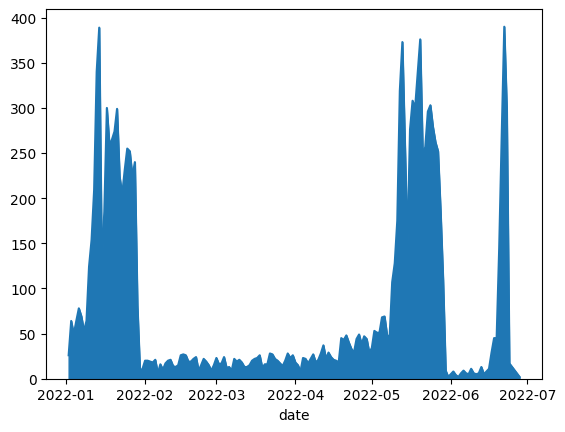

In [37]:
df[df["date"] > datetime(2022, 1, 1).date()].groupby("date")["url"].count().plot.area()